<a href="https://colab.research.google.com/github/mspendyala/ml-examples/blob/main/LogisticRegression/LogisticRegressionExample001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression example

**Import Required Libraries**

In [ ]:
## Import the modules
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score




**Generate the required dataset**

In [ ]:
X, y = make_classification(
    n_samples = 1000,
    n_features = 10,
    n_classes = 2,
    n_clusters_per_class = 1,
    flip_y = 0.03,
    n_informative = 2,
    n_redundant=0,
    n_repeated=0

    
)

**Split the Dataset**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=1)

**View the Train and Test datasets**

In [ ]:
display(X_train)

array([[-0.79397522, -2.35723895,  0.54419626, ..., -0.04151616,
         2.63770585, -0.27349273],
       [ 0.66985238, -1.6742476 ,  0.57995742, ...,  0.70905192,
         1.50371537,  0.65662463],
       [ 0.08787503, -0.51568199,  1.09767886, ...,  0.18504645,
         0.51190714,  1.33985792],
       ...,
       [-1.63195179,  1.34223573, -0.20646024, ..., -0.18775654,
        -0.37888917,  0.74427798],
       [ 1.15061817, -0.31935688,  1.18292677, ...,  0.37570418,
        -0.07193189,  0.39761927],
       [ 0.23043147, -0.44874728,  0.17231593, ...,  1.26435598,
        -3.62958123, -0.45045711]])

In [ ]:
display(X_test)

array([[ 1.08471288e+00, -2.04799254e+00,  7.76031150e-01, ...,
        -4.25884154e-01,  2.58281689e+00, -3.39530121e-01],
       [ 1.52356013e-01,  9.22159879e-01,  1.03317366e+00, ...,
        -1.27456537e+00, -1.14544661e+00,  2.83156129e-01],
       [-1.56129013e-01,  7.22668932e-01, -3.62234753e-01, ...,
        -6.94340443e-01, -1.50109875e+00, -5.00529319e-02],
       ...,
       [ 1.08863768e+00, -1.82818384e+00,  1.05679154e+00, ...,
        -1.32834629e+00,  1.49794908e+00, -4.76947860e-02],
       [-6.25925545e-01, -1.53554951e+00,  1.31454529e+00, ...,
        -2.59128919e-01,  8.21284434e-01,  7.43122184e-01],
       [-2.24088555e-03, -6.41017168e-01,  6.79113985e-01, ...,
         1.80206637e+00,  6.49532995e-01,  2.56583945e-01]])

In [ ]:
display(y_train)

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,

In [ ]:
display(y_test)

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,

**Perform Logistic Regression. Train aka Fit the model**
Fitting is syononymous to Training

In [ ]:
# Create a Logistic Regression object, perform Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Show LogisticRegression coef and intercept
print(model.coef_)
print(model.intercept_)

[[-0.19655061 -2.82710598  0.18608708 -0.06097615 -0.45991638 -0.08905548
   0.47140539  0.12727328  1.4196054  -0.09780552]]
[1.35102629]


**Make Prediction using the model**

In [ ]:
prediction = model.predict(X_test)

**Display the confusion Matrix**

In [ ]:
print(confusion_matrix(y_test, prediction))

[[251   8]
 [ 11 230]]


**Display the Accuracy Score**

In [ ]:
print(accuracy_score(y_test, prediction))

0.962


**Display the classification Report**

In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       259
           1       0.97      0.95      0.96       241

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



**Check Accuracy scores for various other algorithms**

In [ ]:
# Check Accuracy for various Algorithms
algorithm_list = []
algorithm_list.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
algorithm_list.append(('LDA', LinearDiscriminantAnalysis()))
algorithm_list.append(('KNN', KNeighborsClassifier()))
algorithm_list.append(('CART', DecisionTreeClassifier()))
algorithm_list.append(('NB', GaussianNB()))
algorithm_list.append(('SVM', SVC(gamma='auto')))
# Evaluate each model in turn
results = []
algorithm_names = []
for name, algor in algorithm_list:
  kfold = StratifiedKFold(n_splits = 10, random_state=1, shuffle=True)
  cv_results = cross_val_score(algor, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  algorithm_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.952000 (0.037094)
LDA: 0.928000 (0.037094)
KNN: 0.938000 (0.037363)
CART: 0.962000 (0.018868)
NB: 0.926000 (0.042000)
SVM: 0.970000 (0.036056)


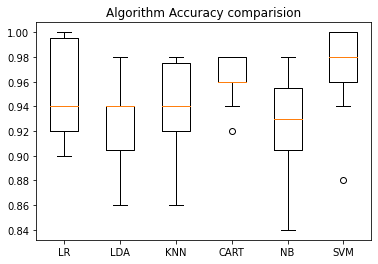

In [ ]:
plt.boxplot(results, labels=algorithm_names)
plt.title('Algorithm Accuracy comparision')
plt.show()